In [40]:
from google.colab import files
uploaded = files.upload()

Saving Pizza.csv to Pizza (2).csv


In [57]:
import pandas as pd
ds = pd.read_csv("Pizza.csv")
ds.head()

,brand,id,mois,prot,fat,ash,sodium,carb,cal
0,A,14069,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,A,14053,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,A,14025,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,A,14016,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,A,14005,30.49,21.28,41.65,4.82,1.64,1.76,4.67


In [59]:
topic=[]
for i in ds:
    topic.append(i)
a=topic.pop(0)
topic.append(a)
mdt=pd.DataFrame(ds[topic])
mdt.head()


,id,mois,prot,fat,ash,sodium,carb,cal,brand
0,14069,27.82,21.43,44.87,5.11,1.77,0.77,4.93,A
1,14053,28.49,21.26,43.89,5.34,1.79,1.02,4.84,A
2,14025,28.35,19.99,45.78,5.08,1.63,0.80,4.95,A
3,14016,30.55,20.15,43.13,4.79,1.61,1.38,4.74,A
4,14005,30.49,21.28,41.65,4.82,1.64,1.76,4.67,A


In [68]:
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder
from sklearn.model_selection import train_test_split

In [69]:
dataset = OrdinalEncoder().fit_transform(mdt)
dataset = pd.DataFrame(mdt)
dataset.columns=topic
dataset["brand"]=LabelEncoder().fit_transform(mdt["brand"])
dataset.head()

,id,mois,prot,fat,ash,sodium,carb,cal,brand
0,14069,27.82,21.43,44.87,5.11,1.77,0.77,4.93,0
1,14053,28.49,21.26,43.89,5.34,1.79,1.02,4.84,0
2,14025,28.35,19.99,45.78,5.08,1.63,0.80,4.95,0
3,14016,30.55,20.15,43.13,4.79,1.61,1.38,4.74,0
4,14005,30.49,21.28,41.65,4.82,1.64,1.76,4.67,0


In [77]:
x= topic[:-1]
y = topic[-1]
print(x)
print(y)

['id', 'mois', 'prot', 'fat', 'ash', 'sodium', 'carb', 'cal']
brand


In [ ]:
a = []
for i in topic:
  temp = []
  for j in mdt[i].unique():
    temp.append(j)
  temp.sort()
  a.append(temp)
print(a)


In [80]:
x_train,x_test,y_train,y_test = train_test_split(dataset[x],dataset[y],test_size=0.3,random_state=142)


In [81]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [83]:
from sklearn.decomposition import PCA
 
pca = PCA(n_components = int(input("Enter no.of Principle Components : ")))
 
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)
final_table=pd.DataFrame(x_test)
final_table.head()

Enter no.of Principle Components : 3


,0,1,2
0,5.080139,3.244912,-0.805355
1,-1.241871,-1.881234,1.980460
2,5.279547,3.033403,-0.786247
3,0.610902,-2.317202,0.326391
4,1.938082,-0.287147,-0.749858


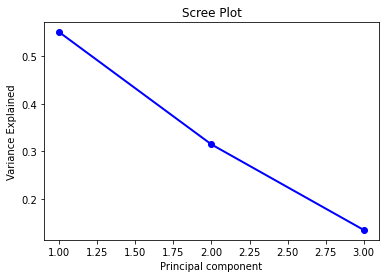

In [84]:
import matplotlib.pyplot as plt
import numpy as np
pc_vals=np.arange(pca.n_components_)+1
plt.plot(pc_vals,pca.explained_variance_ratio_,'o-',linewidth=2,color="blue")
plt.title("Scree Plot")
plt.xlabel('Principal component')
plt.ylabel('Variance Explained')
plt.show()